In [1]:
from calculations_utils import *
import matplotlib.pyplot as plt
import datetime
import warnings
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 18})

# Fig 1

## a)

In [2]:
mob = 10**4
R = 2*10**-9
T = 300
omega_ev_array = np.logspace(np.log10(0.01),np.log10(0.2),100)
kp_vac_025 = []
kp_vac_05 = []
kp_vac_075 = []
kp_vac_1 = []
for omega_ev in omega_ev_array:
    omega = e*omega_ev/hbar

    mu = 0.25*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_025.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = 1)/omega)

    mu = 0.5*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_05.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

    mu = 0.75*e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_075.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

    mu = e
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)
    kp_vac_1.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = 1)/omega)

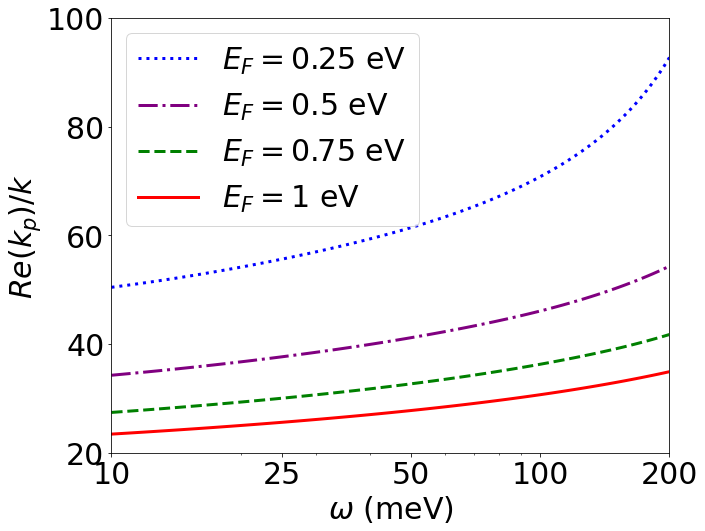

In [3]:
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 30})

plt.plot(1000*omega_ev_array,np.real(kp_vac_025), linewidth=3, color='blue', label='$E_F = 0.25$ eV', linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_vac_05), linewidth=3, color='purple', label='$E_F = 0.5$ eV', linestyle='dashdot')
plt.plot(1000*omega_ev_array,np.real(kp_vac_075), linewidth=3, color='green', label='$E_F = 0.75$ eV', linestyle='dashed')
plt.plot(1000*omega_ev_array,np.real(kp_vac_1), linewidth=3, color='red', label='$E_F = 1$ eV')

plt.xscale('log')
#plt.yscale('log')

plt.xlim([10,200])
plt.ylim([20,100])
plt.legend()
plt.xticks(ticks = [10,25,50,100,200], labels=[10,25,50,100,200])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(k_p)/k$')
plt.savefig('figs/fig1b', bbox_inches = "tight")
plt.show()

## b)

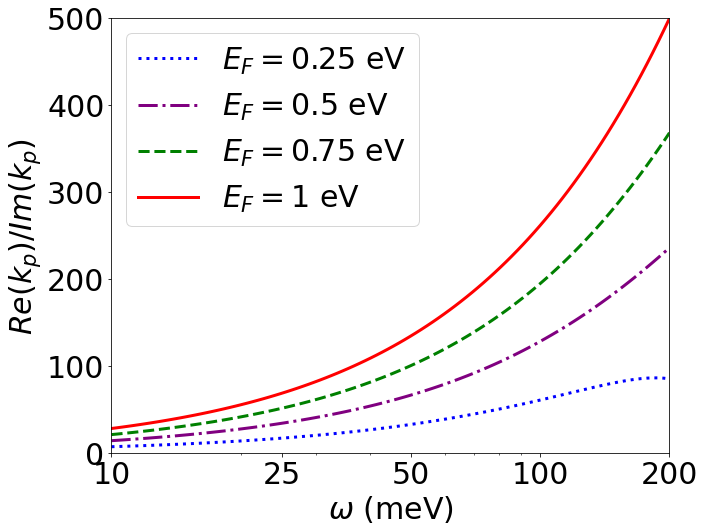

In [4]:
plt.plot(1000*omega_ev_array,np.real(kp_vac_025)/np.imag(kp_vac_025), linewidth=3, color='blue', label='$E_F = 0.25$ eV', linestyle='dotted')
plt.plot(1000*omega_ev_array,np.real(kp_vac_05)/np.imag(kp_vac_05), linewidth=3, color='purple', label='$E_F = 0.5$ eV', linestyle='dashdot')
plt.plot(1000*omega_ev_array,np.real(kp_vac_075)/np.imag(kp_vac_075), linewidth=3, color='green', label='$E_F = 0.75$ eV', linestyle='dashed')
plt.plot(1000*omega_ev_array,np.real(kp_vac_1)/np.imag(kp_vac_1), linewidth=3, color='red', label='$E_F = 1$ eV')

plt.xscale('log')
#plt.yscale('log')

plt.xlim([10,200])
plt.ylim([0,500])
plt.legend()
plt.xticks(ticks = [10,25,50,100,200], labels=[10,25,50,100,200])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(k_p)/Im(k_p)$')
plt.savefig('figs/fig1c', bbox_inches = "tight")
plt.show()

# Fig 2

## a)

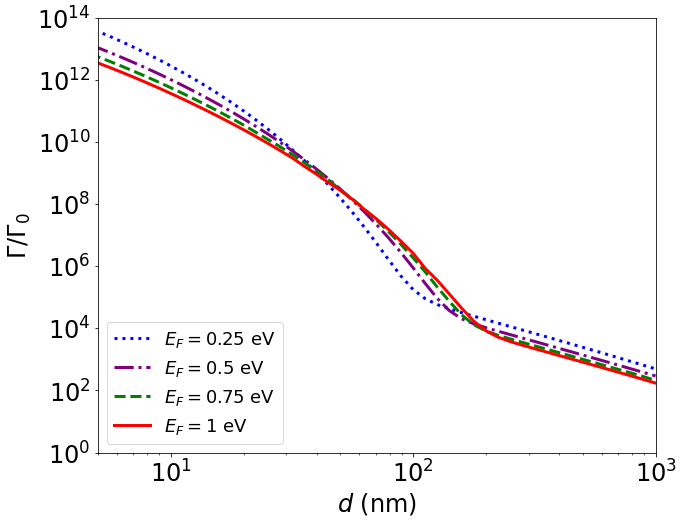

In [5]:
plt.rcParams.update({'font.size': 24})

Gammas = np.load('Gamma_CNT.npy')

omegaCut = 0.0000044*e/hbar
MCut = 10
ne = 6
ng = 5
d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))
d_matrix.append(dne)
d_matrix.append(dng)
G0 = Gamma_0(d_matrix, 6, 5, 10, omegaCut)

distances_nm = np.logspace(0,3,61)

plt.plot(distances_nm,Gammas[0]/G0, linewidth=3, color='blue', label='$E_F = 0.25$ eV', linestyle='dotted')
plt.plot(distances_nm,Gammas[1]/G0, linewidth=3, color='purple', label='$E_F = 0.5$ eV', linestyle='dashdot')
plt.plot(distances_nm,Gammas[2]/G0, linewidth=3, color='green', label='$E_F = 0.75$ eV', linestyle='dashed')
plt.plot(distances_nm,Gammas[3]/G0, linewidth=3, color='red', label='$E_F = 1$ eV')


plt.xlim([5,1000])
plt.ylim([1,1*10**14])
plt.legend(loc='lower left', fontsize=18)
plt.xlabel('$d$ (nm)')
plt.ylabel('$\Gamma/\Gamma_0$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('figs/fig2a')
plt.show()

## inset

In [2]:
omega_0 = domega(6,5)
mu_ev_array = np.array([0.25,0.5,0.75,1])
T = 300
R = 2*10**(-9)
d = R + 10*10**(-9)
m_max = 5

gammas = []
omega_steps = np.linspace(0.01,0.5,50)
for mu_ev in mu_ev_array:
    print(mu_ev)
    gamma_mu = []
    for step in omega_steps:
        gamma_mu.append(gamma(omega_0, omega_0*step, mu_ev*e, tau_g(10**4,mu_ev*e), T, R, d, m_max))
    gammas.append(gamma_mu)

0.25
0.5
0.75
1.0


c:\Users\Yuri\Documents\doutorado\nanotubos\code_v2\calculations_utils.py:162: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(integrand, 0, 10/R)


In [7]:
gammas[3]

[23913882651138.953,
 6719543565242.215,
 3287862245644.7637,
 2005565393778.1208,
 1378138179068.9587,
 1020433098651.1947,
 13695054768.565397,
 642117106659.5968,
 535494692688.19385,
 455771887307.361,
 394983424578.59576,
 347436115718.4113,
 309453843463.3018,
 278571052992.22614,
 253080502854.32327,
 231767459501.34778,
 213747118804.92233,
 198361700865.55432,
 185113348051.84644,
 173619212293.78174,
 163580692034.78122,
 154761923175.42432,
 146974460400.8183,
 140066184394.57034,
 133913147256.891,
 128413495133.09686,
 123482881855.7047,
 119050967849.18065,
 115058719160.90736,
 111456303430.23524,
 108201436129.26422,
 105258069940.22108,
 102595348141.71301,
 100186762959.52022,
 98009474401.64369,
 96043755770.82668,
 94272539948.10101,
 92681046443.77568,
 91256473662.34152,
 89987744211.59279,
 88865293680.78654,
 87880895318.62383,
 87027514605.56906,
 86299188944.65154,
 85690928670.80995,
 85198636361.34743,
 84819042065.13873,
 84549652590.82732,
 84388713432.376

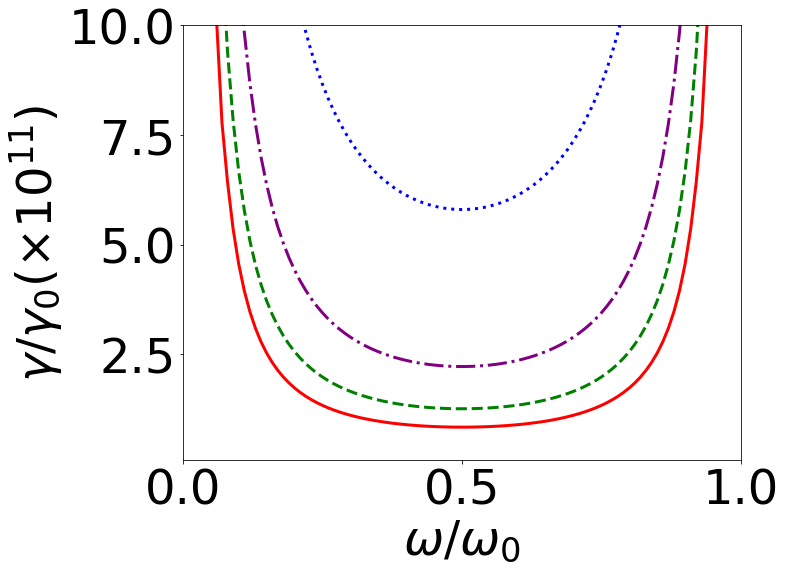

In [10]:
plt.rcParams.update({'font.size': 48})

# Fixing a small numerical error
gammas[3][6] = (gammas[3][5] + gammas[3][8])/2

plt.plot(np.linspace(0.01,0.99,99),np.array(gammas[0][:-1] + gammas[0][::-1])/(10**11), linewidth=3, color='blue', label='$E_F = 0.25$ eV', linestyle='dotted')
plt.plot(np.linspace(0.01,0.99,99),np.array(gammas[1][:-1] + gammas[1][::-1])/(10**11), linewidth=3, color='purple', label='$E_F = 0.5$ eV', linestyle='dashdot')
plt.plot(np.linspace(0.01,0.99,99),np.array(gammas[2][:-1] + gammas[2][::-1])/(10**11), linewidth=3, color='green', label='$E_F = 0.75$ eV', linestyle='dashed')
plt.plot(np.linspace(0.01,0.99,99),np.array(gammas[3][:-1] + gammas[3][::-1])/(10**11), linewidth=3, color='red', label='$E_F = 1$ eV')

plt.xlim([0,1])
plt.ylim([0.1,10])
plt.xlabel('$\omega/\omega_0$')
plt.ylabel(r'$\gamma/\gamma_0 (\times 10^{11})$')
#plt.yscale('log')
plt.savefig('figs/fig2ainset', bbox_inches = "tight")
plt.show()

## b)

In [14]:
QEs[3]

array([2.06442967e+00, 2.03083224e+00, 1.99224495e+00, 1.94765278e+00,
       1.89578193e+00, 1.83514319e+00, 1.76415724e+00, 1.68138933e+00,
       1.58589833e+00, 1.47765481e+00, 1.35791417e+00, 1.22938043e+00,
       1.09602101e+00, 9.62516583e-01, 9.06637280e-01, 7.74509566e-01,
       6.53704093e-01, 5.46206240e-01, 4.52602488e-01, 3.30882682e-01,
       2.75414253e-01, 2.17684370e-01, 1.80629635e-01, 1.49259984e-01,
       1.22805920e-01, 1.00629137e-01, 8.21280066e-02, 6.68112639e-02,
       5.41879997e-02, 4.38441157e-02, 3.54323032e-02, 2.71945278e-02,
       2.20069893e-02, 1.76182709e-02, 1.50448407e-02, 1.24085179e-02,
       9.61385851e-03, 8.23996066e-03, 6.72160944e-03, 5.34705671e-03,
       4.10218386e-03, 6.47652256e-03, 1.58612414e-03, 7.74756529e-04,
       3.20872083e-04, 1.30526829e-04, 6.50005902e-05, 4.08016261e-05,
       2.95292737e-05, 2.25517717e-05, 1.74808578e-05, 1.35912687e-05,
       1.05685072e-05, 8.21409347e-06, 6.38038984e-06, 4.95298731e-06,
      

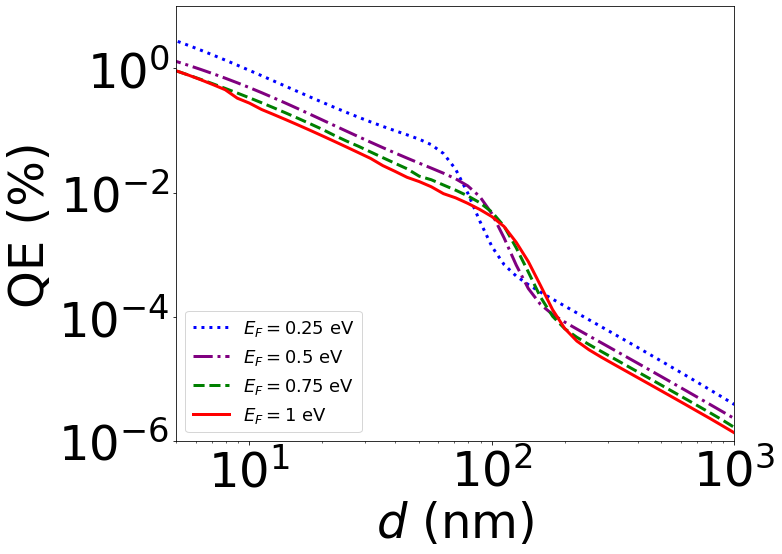

In [15]:
Gammas = np.load('Gamma_CNT.npy')
Gammas1ph = np.load('Gamma_CNT_1ph.npy')
QEs = 100*Gammas/(Gammas + Gammas1ph)
QEs[3][-20] = (QEs[3][-21] + QEs[3][-19])/2
distances_nm = np.logspace(0,3,61)

plt.plot(distances_nm,QEs[0], linewidth=3, color='blue', label='$E_F = 0.25$ eV', linestyle='dotted')
plt.plot(distances_nm,QEs[1], linewidth=3, color='purple', label='$E_F = 0.5$ eV', linestyle='dashdot')
plt.plot(distances_nm,QEs[2], linewidth=3, color='green', label='$E_F = 0.75$ eV', linestyle='dashed')
plt.plot(distances_nm,QEs[3], linewidth=3, color='red', label='$E_F = 1$ eV')


plt.xlim([5,1000])
plt.ylim([10**-6,10])
plt.legend(loc='lower left', fontsize=18)
plt.xlabel('$d$ (nm)')
plt.ylabel('QE (%)')
plt.yscale('log')
plt.xscale('log')
plt.savefig('figs/fig2b')
plt.show()

# Fig 3

In [16]:
mob = 10**4
mu = e
T = 300
epsilon_sil = 11.68
omega_ev_array = np.linspace(0.01,0.2,100)
kp_sil_10_0 = []
kp_sil_10_1 = []
kp_sil_14_0 = []
kp_sil_14_1 = []
kp_sil_14_2 = []
kp_sil_18_0 = []
kp_sil_18_1 = []
kp_sil_18_2 = []
kp_sil_18_3 = []
for omega_ev in omega_ev_array:
    omega = e*omega_ev/hbar
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)

    R = 20*10**-9
    kp_sil_10_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_sil)/omega)
    kp_sil_10_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)

    R = 30*10**-9
    kp_sil_14_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_sil)/omega)
    kp_sil_14_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_14_2.append(c*kp_res(2, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)

    R = 42*10**-9
    kp_sil_18_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_sil)/omega)
    kp_sil_18_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_18_2.append(c*kp_res(2, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_18_3.append(c*kp_res(3, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)

c:\Users\Yuri\Documents\doutorado\nanotubos\code_v2\calculations_utils.py:82: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_re = integrate.quad(F_re, 0, 2*np.pi)
c:\Users\Yuri\Documents\doutorado\nanotubos\code_v2\calculations_utils.py:83: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_im = integrate.quad(F_im, 0, 2*np.pi)
c:\Users\Yuri\Documents\doutorado\nanotubos\code_v2\calculations_utils.py:82: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral_re = integrate.quad(F_re, 0, 2*np.pi)


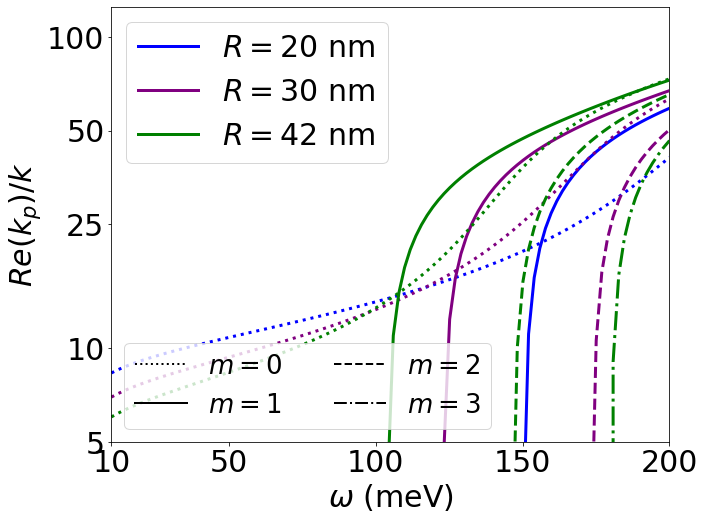

In [17]:
plt.rcParams.update({'font.size': 30})

plt.plot(1000*omega_ev_array,np.real(kp_sil_10_0), color='blue', linewidth=3, linestyle='dotted')
R1, = plt.plot(1000*omega_ev_array,np.real(kp_sil_10_1), color='blue', linewidth=3, linestyle='solid', label='$R = 20$ nm')

plt.plot(1000*omega_ev_array,np.real(kp_sil_14_0), color='purple', linewidth=3, linestyle='dotted')
R2, = plt.plot(1000*omega_ev_array,np.real(kp_sil_14_1), color='purple', linewidth=3, linestyle='solid', label='$R = 30$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_sil_14_2), color='purple', linewidth=3, linestyle='dashed')

plt.plot(1000*omega_ev_array,np.real(kp_sil_18_0), color='green', linewidth=3, linestyle='dotted')
R3, = plt.plot(1000*omega_ev_array,np.real(kp_sil_18_1), color='green', linewidth=3, linestyle='solid', label='$R = 42$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_2), color='green', linewidth=3, linestyle='dashed')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_3), color='green', linewidth=3, linestyle='dashdot')

m0, = plt.plot([0,0], [0,0], color='black', linewidth=2, linestyle='dotted', label='$m=0$')
m1, = plt.plot([0,0], [0,0], color='black', linewidth=2, linestyle='solid', label='$m=1$')
m2, = plt.plot([0,0], [0,0], color='black', linewidth=2, linestyle='dashed', label='$m=2$')
m3, = plt.plot([0,0], [0,0], color='black', linewidth=2, linestyle='dashdot', label='$m=3$')

#plt.xscale('log')
plt.yscale('log')

plt.xlim([10,200])
plt.ylim([5,125])
plt.minorticks_off()

style_legend = plt.legend(handles = [m0, m1, m2, m3], loc='lower left', ncol=2, fontsize=26)
ax = plt.gca().add_artist(style_legend)
plt.legend(handles = [R1,R2,R3], loc = 'upper left', fontsize=30)

plt.xticks([10,50,100,150,200])
plt.yticks(ticks = [5,10,25,50,100], labels = [5,10,25,50,100])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(k_p)/k$')
plt.savefig('figs/fig3a', bbox_inches = "tight")
plt.show()

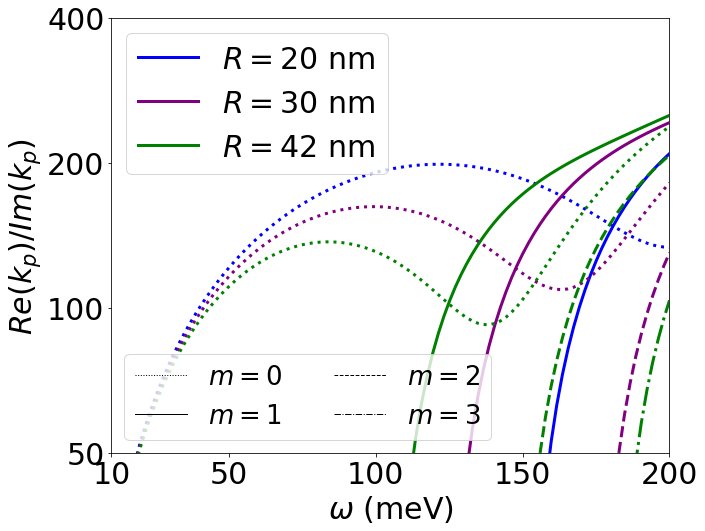

In [19]:
warnings.filterwarnings('ignore')
plt.plot(1000*omega_ev_array,np.real(kp_sil_10_0)/np.imag(kp_sil_10_0), color='blue', linewidth=3, linestyle='dotted')
R1, = plt.plot(1000*omega_ev_array,np.real(kp_sil_10_1)/np.imag(kp_sil_10_1), color='blue', linewidth=3, linestyle='solid', label='$R = 20$ nm')

plt.plot(1000*omega_ev_array,np.real(kp_sil_14_0)/np.imag(kp_sil_14_0), color='purple', linewidth=3, linestyle='dotted')
R2, = plt.plot(1000*omega_ev_array,np.real(kp_sil_14_1)/np.imag(kp_sil_14_1), color='purple', linewidth=3, linestyle='solid', label='$R = 30$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_sil_14_2)/np.imag(kp_sil_14_2), color='purple', linewidth=3, linestyle='dashed')

plt.plot(1000*omega_ev_array,np.real(kp_sil_18_0)/np.imag(kp_sil_18_0), color='green', linewidth=3, linestyle='dotted')
R3, = plt.plot(1000*omega_ev_array,np.real(kp_sil_18_1)/np.imag(kp_sil_18_1), color='green', linewidth=3, linestyle='solid', label='$R = 42$ nm')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_2)/np.imag(kp_sil_18_2), color='green', linewidth=3, linestyle='dashed')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_3)/np.imag(kp_sil_18_3), color='green', linewidth=3, linestyle='dashdot')

m0, = plt.plot([0,0], [0,0], color='black', linewidth=1, linestyle='dotted', label='$m=0$')
m1, = plt.plot([0,0], [0,0], color='black', linewidth=1, linestyle='solid', label='$m=1$')
m2, = plt.plot([0,0], [0,0], color='black', linewidth=1, linestyle='dashed', label='$m=2$')
m3, = plt.plot([0,0], [0,0], color='black', linewidth=1, linestyle='dashdot', label='$m=3$')

#plt.xscale('log')
plt.yscale('log')
plt.minorticks_off()
plt.xlim([10,200])
plt.ylim([50,400])

style_legend = plt.legend(handles = [m0, m1, m2, m3], loc='lower left', ncol=2, fontsize=26)
ax = plt.gca().add_artist(style_legend)
plt.legend(handles = [R1,R2,R3], loc = 'upper left', fontsize=30)

plt.xticks([10,50,100,150,200])
plt.yticks(ticks = [50,100,200,400], labels = [50,100,200,400])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(k_p)/Im(k_p)$')
plt.savefig('figs/fig3b', bbox_inches = "tight")
plt.show()

# Fig 4

## a)

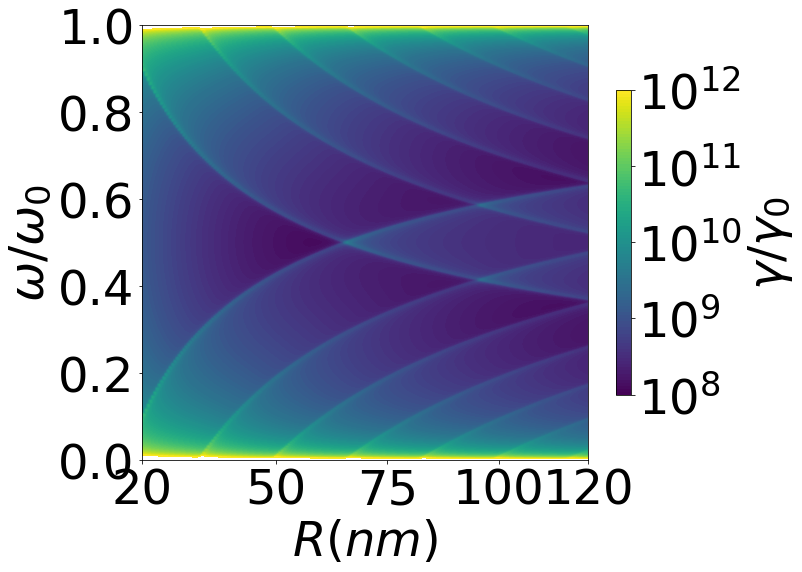

In [49]:
from matplotlib import ticker, cm

omega_steps = np.arange(0.002,0.99801,0.002)
R_nm_array = np.arange(20,120.001,0.5)
gammas_half1 = np.load('contour_plot_data_20_60.npy')
gammas_half2 = np.load('contour_plot_data_60_100.npy')
gammas_half3 = np.load('contour_plot_data_100_120.npy')
gammas_half = np.concatenate((gammas_half1,gammas_half2,gammas_half3))

gammas = []
for i in range(len(gammas_half)):
    gammas.append(list(gammas_half[i][:-1]) + list(gammas_half[i][::-1]))
gammas = np.transpose(np.array(gammas))

fig, ax = plt.subplots(figsize=(10, 8),nrows=1, ncols=1)

c = ax.contourf(R_nm_array, omega_steps, gammas, np.logspace(np.log10(10**8), 12,100), locator=ticker.LogLocator())
b0 = fig.colorbar(c,ax=ax,ticks=[10**i for i in range(6,13,1)], shrink=0.7, label='$\gamma/\gamma_0$')
ax.set_xlabel("$R (nm)$")
ax.set_ylabel("$\omega/\omega_0$")
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xticks([20,50,75,100,120])
ax.set_xlim(right=120)
plt.savefig('figs/fig4a')
plt.show()

## b)

In [56]:
omega_0 = domega(6,5)
mob = 10**4
mu = e
T = 300
R = 100*10**(-9)
epsilon1 = 4
epsilon2 = e**2*mu/(R*np.pi*epsilon_0*(hbar*omega_0/2)**2) - 1
epsilon3 = 11.68
epsilon4 = 2*e**2*mu/(R*np.pi*epsilon_0*(hbar*omega_0/2)**2) - 1

d = 10*10**-9
m_max = 12

gamma_1 = []
gamma_2 = []
gamma_3 = []
gamma_4 = []
omega_steps = np.arange(0.002,0.5001,0.002)

for step in omega_steps:
    print(f'step: {step}', end='\r')
    gamma_1.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R, d + R, m_max, epsilon=epsilon1))
    gamma_2.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R, d + R, m_max, epsilon=epsilon2))
    gamma_3.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R, d + R, m_max, epsilon=epsilon3))
    gamma_4.append(gamma(omega_0, omega_0*step, mu, tau_g(mob,mu), T, R, d + R, m_max, epsilon=epsilon4))
    gammas = [gamma_1,gamma_2,gamma_3,gamma_4]
    np.save('fig4b.npy',np.array(gammas))

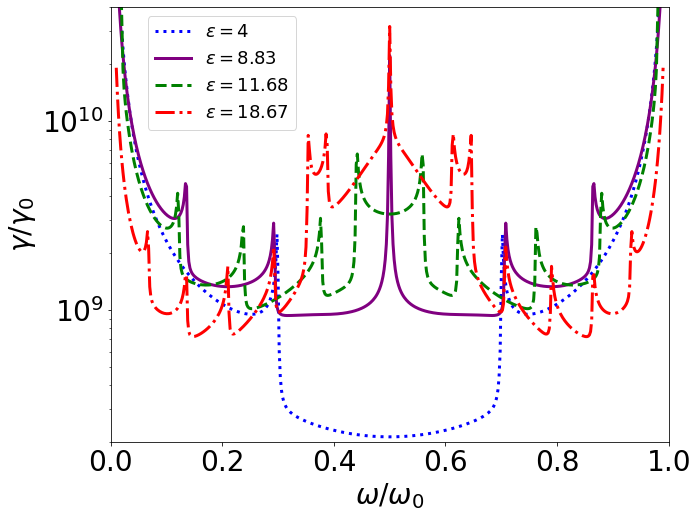

In [14]:
plt.rcParams.update({'font.size': 28})
omega_ar = np.arange(0.01,0.99001,0.002)

gammas = np.load('fig4b.npy').tolist()
gamma_1l = gammas[0]
gamma_2l = gammas[1]
gamma_3l = gammas[2]
gamma_4l = gammas[3]

plt.plot(omega_ar, gamma_1l[:-1] + gamma_1l[::-1], label='$\epsilon = 4$', linewidth=3, linestyle='dotted',color='blue')
plt.plot(omega_ar, gamma_2l[:-1] + gamma_2l[::-1], label='$\epsilon = 7.33$', linewidth=3, linestyle='solid',color='purple')
plt.plot(omega_ar, gamma_3l[:-1] + gamma_3l[::-1], label='$\epsilon = 11.68$', linewidth=3, linestyle='dashed', color='green')
plt.plot(omega_ar, gamma_4l[:-1] + gamma_4l[::-1], label='$\epsilon = 15.$', linewidth=3, linestyle='dashdot', color='red')

plt.xlim([0,1])
plt.ylim([2*10**8,4*10**10])
plt.legend(loc='upper left', fontsize=18, bbox_to_anchor=(0.05, 0, 1, 1))
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')
plt.savefig('figs/fig4b', bbox_inches = "tight")
plt.show()

# Fig 5

## a)

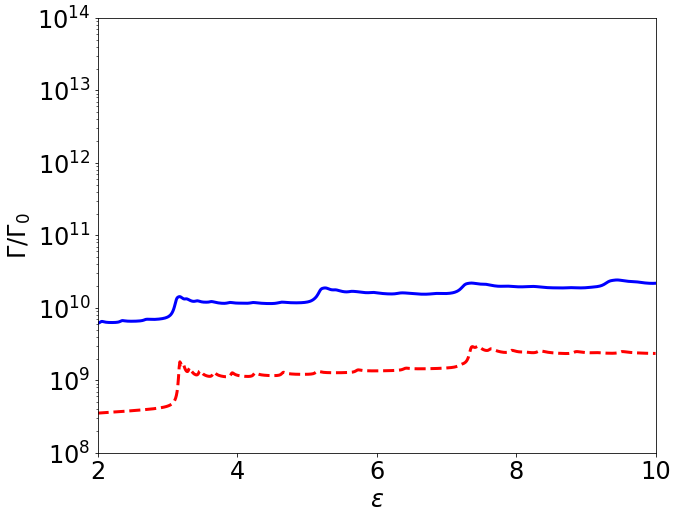

In [4]:
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 24})

omegaCut = 0.0000044*e/hbar
MCut = 20
ne = 6
ng = 5
d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))
d_matrix.append(dne)
d_matrix.append(dng)
G0 = Gamma_0(d_matrix, 6, 5, MCut, omegaCut)

epsilon_array = np.arange(2,10.000000001,0.01)
#Gammas05 = np.concatenate((np.load('Gamma_gcw_epsilon_2_6.npy'),np.load('Gamma_gcw_epsilon_6_10.npy')))
Gammas05 = np.load('Gamma_gcw_epsilon_05ev.npy')
plt.plot(epsilon_array,Gammas05/G0, linewidth=3, color='blue')

#Gammas10 = np.concatenate((np.load('Gamma_gcw_epsilon_2_6_1ev.npy'),np.load('Gamma_gcw_epsilon_6_10_1ev.npy')))
Gammas10 = np.load('Gamma_gcw_epsilon_1ev.npy')
plt.plot(epsilon_array,Gammas10/G0, linewidth=3, linestyle = 'dashed', color= 'red')

plt.xlim([2,10])
plt.ylim([10**8,10**14])
plt.xlabel('$\epsilon$')
plt.yscale('log')
plt.ylabel(r'$\Gamma/\Gamma_0$')
plt.xticks([2,4,6,8,10])
#plt.yticks([1,2,3,4], labels=[1,2,3,4])
plt.savefig('figs/fig5a', bbox_inches = "tight")
plt.show()

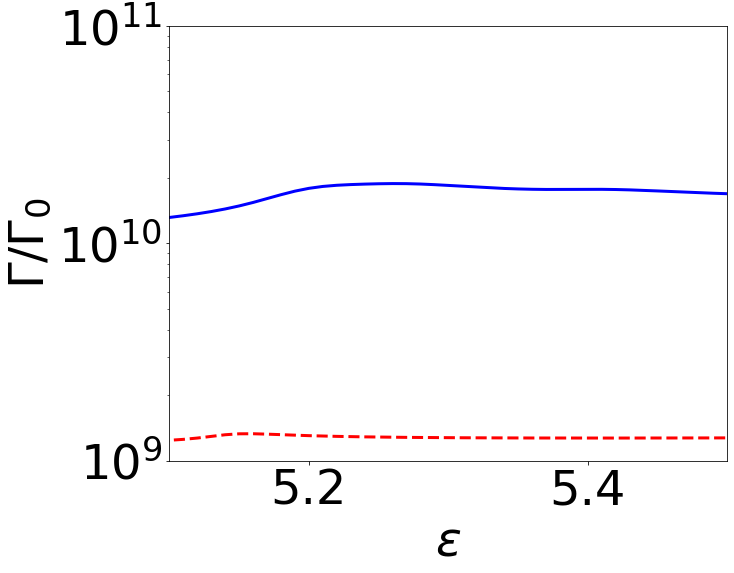

In [30]:
epsilon_array = np.arange(2,10.000000001,0.01)
#Gammas05 = np.concatenate((np.load('Gamma_gcw_epsilon_2_6.npy'),np.load('Gamma_gcw_epsilon_6_10.npy')))
Gammas05 = np.load('Gamma_gcw_epsilon_05ev.npy')
plt.plot(epsilon_array,Gammas05/G0, linewidth=3, color='blue')

#Gammas10 = np.concatenate((np.load('Gamma_gcw_epsilon_2_6_1ev.npy'),np.load('Gamma_gcw_epsilon_6_10_1ev.npy')))
Gammas10 = np.load('Gamma_gcw_epsilon_1ev.npy')
plt.plot(epsilon_array,Gammas10/G0, linewidth=3, linestyle = 'dashed', color= 'red')

plt.xlim([5.1,5.5])
plt.ylim([10**9,10**11])
plt.xlabel('$\epsilon$')
plt.yscale('log')
plt.ylabel(r'$\Gamma/\Gamma_0$')
plt.show()

## inset

In [26]:
mob = 10**4
mu = 0.5*e
T = 300
epsilon_sil = 3.1
R = 50*10**-9
omega_ev_array = np.linspace(0.01,0.2,100)
kp_sil_18_0 = []
kp_sil_18_1 = []
kp_sil_18_2 = []
for omega_ev in omega_ev_array:
    omega = e*omega_ev/hbar
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)

    kp_sil_18_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_sil)/omega)
    kp_sil_18_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_18_2.append(c*kp_res(2, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)

c:\Users\Yuri\Documents\doutorado\nanotubos\code_v2\calculations_utils.py:82: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_re = integrate.quad(F_re, 0, 2*np.pi)
c:\Users\Yuri\Documents\doutorado\nanotubos\code_v2\calculations_utils.py:83: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_im = integrate.quad(F_im, 0, 2*np.pi)


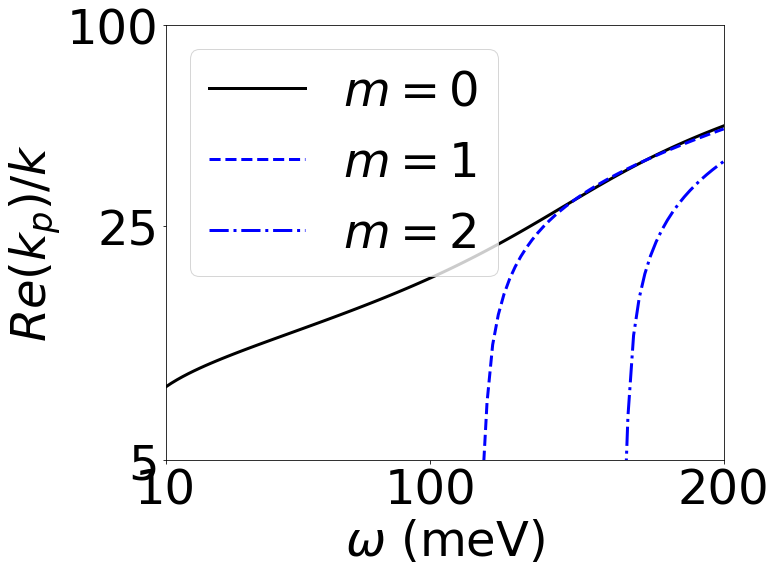

In [27]:
plt.rcParams.update({'font.size': 48})
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_0), color='black', linewidth=3, linestyle='solid', label='$m = 0$')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_1), color='blue', linewidth=3, linestyle='dashed', label='$m = 1$')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_2), color='blue', linewidth=3, linestyle='dashdot', label='$m = 2$')

#plt.xscale('log')
plt.yscale('log')

plt.xlim([10,200])
plt.ylim([5,100])
plt.minorticks_off()

plt.legend(loc = 'upper left')

plt.xticks([10,100,200])
plt.yticks(ticks = [5,25,100], labels = [5,25,100])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(k_p)/k$')
plt.savefig('figs/fig5ainset1', bbox_inches = "tight")
plt.show()

In [31]:
mob = 10**4
mu = 0.5*e
T = 300
epsilon_sil = 5.15
R = 50*10**-9
omega_ev_array = np.linspace(0.01,0.3,100)
kp_sil_18_0 = []
kp_sil_18_1 = []
kp_sil_18_2 = []
kp_sil_18_3 = []
kp_sil_18_4 = []
for omega_ev in omega_ev_array:
    omega = e*omega_ev/hbar
    sigma, _ = conductivity(omega, mu, tau_g(mob,mu), T)

    kp_sil_18_0.append(c*kp_res(0, sigma, omega, mu, tau_g(mob,mu), T, R, 150, epsilon = epsilon_sil)/omega)
    kp_sil_18_1.append(c*kp_res(1, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_18_2.append(c*kp_res(2, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)
    kp_sil_18_3.append(c*kp_res(3, sigma, omega, mu, tau_g(mob,mu), T, R, 60, epsilon = epsilon_sil)/omega)

c:\Users\Yuri\Documents\doutorado\nanotubos\code_v2\calculations_utils.py:82: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_re = integrate.quad(F_re, 0, 2*np.pi)
c:\Users\Yuri\Documents\doutorado\nanotubos\code_v2\calculations_utils.py:83: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_im = integrate.quad(F_im, 0, 2*np.pi)


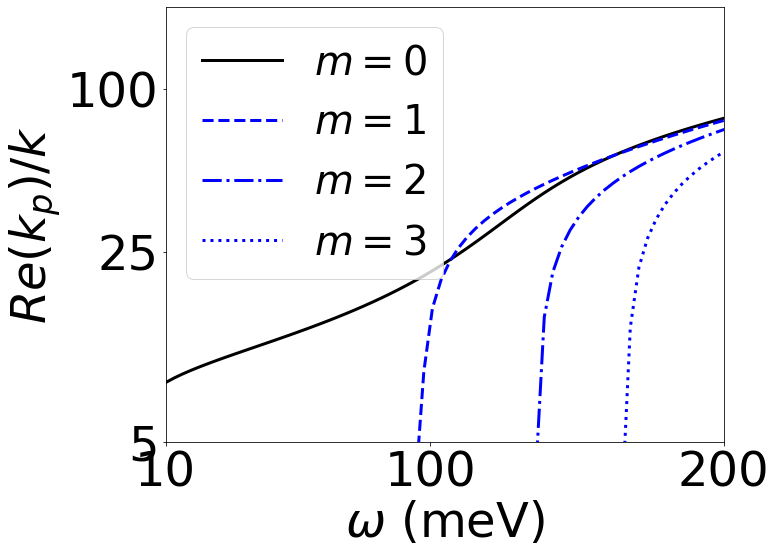

In [40]:
plt.rcParams.update({'font.size': 48})
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_0), color='black', linewidth=3, linestyle='solid', label='$m = 0$')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_1), color='blue', linewidth=3, linestyle='dashed', label='$m = 1$')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_2), color='blue', linewidth=3, linestyle='dashdot', label='$m = 2$')
plt.plot(1000*omega_ev_array,np.real(kp_sil_18_3), color='blue', linewidth=3, linestyle='dotted', label='$m = 3$')


#plt.xscale('log')
plt.yscale('log')

plt.xlim([10,200])
plt.ylim([5,200])
plt.minorticks_off()

plt.legend(loc = 'upper left', fontsize = 40)

plt.xticks([10,100,200])
plt.yticks(ticks = [5,25,100], labels = [5,25,100])
plt.xlabel('$\omega$ (meV)')
plt.ylabel('$Re(k_p)/k$')
plt.savefig('figs/fig5ainset2', bbox_inches = "tight")
plt.show()

## b)

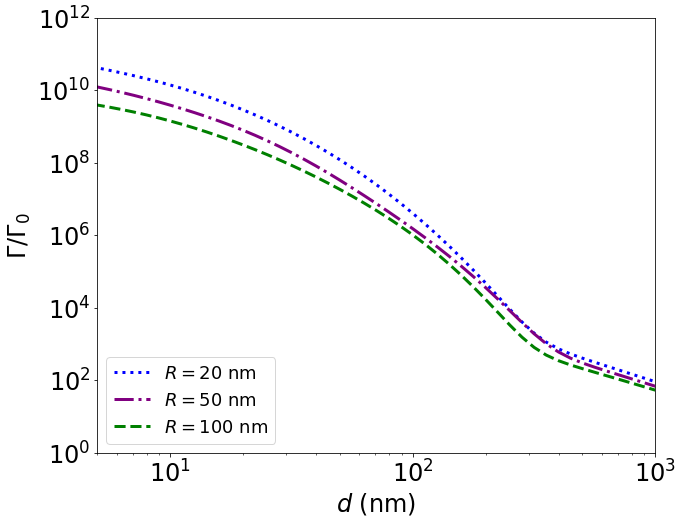

In [41]:
plt.rcParams.update({'font.size': 24})

Gammas = np.load('Gamma_GCW.npy')

omegaCut = 0.0000044*e/hbar
MCut = 10
ne = 6
ng = 5
d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))
d_matrix.append(dne)
d_matrix.append(dng)
G0 = Gamma_0(d_matrix, 6, 5, 10, omegaCut)

distances_nm = np.logspace(0,3,61)

plt.plot(distances_nm,Gammas[0]/G0, linewidth=3, color='blue', label='$R = 20$ nm', linestyle='dotted')
plt.plot(distances_nm,Gammas[1]/G0, linewidth=3, color='purple', label='$R = 50$ nm', linestyle='dashdot')
plt.plot(distances_nm,Gammas[2]/G0, linewidth=3, color='green', label='$R = 100$ nm', linestyle='dashed')


plt.xlim([5,1000])
plt.ylim([1,10**12])
plt.legend(loc='lower left', fontsize=18)
plt.xlabel('$d$ (nm)')
plt.ylabel('$\Gamma/\Gamma_0$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('figs/fig5b')
plt.show()

## inset

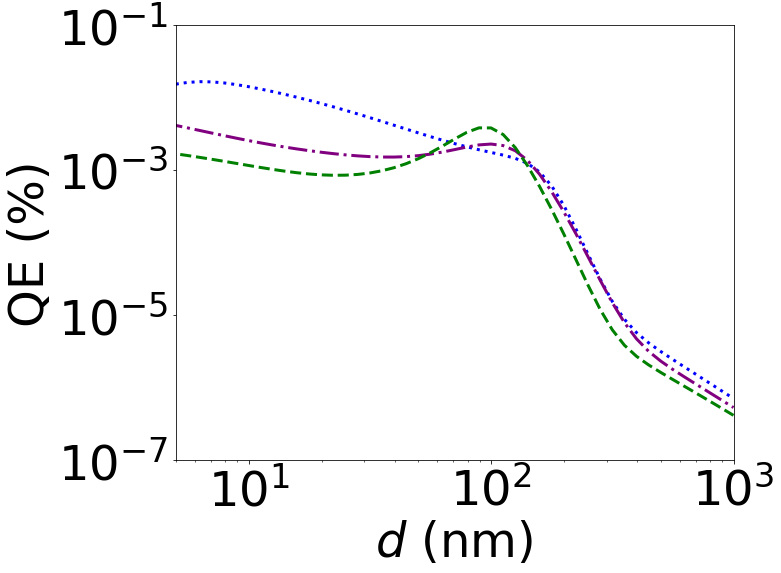

In [43]:
plt.rcParams.update({'font.size': 48})
Gammas = np.load('Gamma_GCW.npy')
Gammas1ph = np.load('Gamma_GCW_1ph.npy')
QEs = 100*Gammas/(Gammas + Gammas1ph)
distances_nm = np.logspace(0,3,61)

plt.plot(distances_nm,QEs[0], linewidth=3, color='blue', label='$R = 20$ nm', linestyle='dotted')
plt.plot(distances_nm,QEs[1], linewidth=3, color='purple', label='$R = 50$ nm', linestyle='dashdot')
plt.plot(distances_nm,QEs[2], linewidth=3, color='green', label='$R = 100$ nm', linestyle='dashed')


plt.xlim([5,1000])
plt.ylim([10**-7,10**-1])
#plt.legend(loc='lower left', fontsize=18)
plt.xlabel('$d$ (nm)')
plt.ylabel('QE (%)')
plt.yscale('log')
plt.xscale('log')
plt.savefig('figs/fig5b_inset', bbox_inches = "tight")
plt.show()